In [15]:
import itertools
import subprocess
import pandas as pd
from tqdm import tqdm
import numpy as np

exp = range(1, 11+1)
algos = ['conv', 'strassenSeuil', 'strassen']
n = 7

base_path = '../ex/s1-t11-n7-r1'

In [16]:
def get_time(path1, path2, algo):
    o = subprocess.run(['INF8775_tp1', path1, path2, algo, 't'], shell=True, capture_output=True)
    return float(str(o.stdout)[2:-1])

In [17]:
df = pd.DataFrame(columns=['size', 'avg_time', 'algo'])

In [18]:
for e in exp[:8]:
    print(e)
    for algo in algos:
        size = pow(2, e)
        total_time = 0
        combinations = list(itertools.combinations(range(n), 2))
        for n1, n2 in tqdm(combinations):
            p1 = f'{base_path}/ex{e}_{n1}'
            p2 = f'{base_path}/ex{e}_{n2}'
            total_time += get_time(p1, p2, algo)
        avg_time = total_time / len(combinations)
        df = df.append({'size': size, 'avg_time': avg_time, 'algo': algo}, ignore_index=True)


1


100%|██████████| 21/21 [00:00<00:00, 33.15it/s]


2


100%|██████████| 21/21 [00:00<00:00, 31.56it/s]


3


100%|██████████| 21/21 [00:00<00:00, 30.26it/s]


4


100%|██████████| 21/21 [00:00<00:00, 25.07it/s]


5


100%|██████████| 21/21 [00:01<00:00, 12.26it/s]


6


100%|██████████| 21/21 [00:07<00:00,  2.65it/s]


7


100%|██████████| 21/21 [00:48<00:00,  2.31s/it]


8


100%|██████████| 21/21 [05:29<00:00, 15.71s/it]


In [2]:
# df

In [19]:
# idx = np.where(
#     (df['size'] == 256)
#     & (df['old_code'] == False)
# )
# df.loc[idx]

In [20]:
df.to_csv('new_data.csv', index=False)

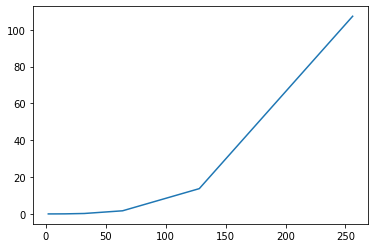

In [24]:
from matplotlib import pyplot
df_c = df[df['algo'] == 'conv']
print(pyplot.plot(df_c['size'], df_c['avg_time']))